<a href="https://colab.research.google.com/github/kenshimokawa/Intro-to-machine-learning-project/blob/Ting/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets preparation

In [1]:
from google.colab import userdata
import os
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')

In [2]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 96% 219M/228M [00:02<00:00, 99.0MB/s]
100% 228M/228M [00:02<00:00, 110MB/s] 


In [3]:
!unzip 'the-movies-dataset.zip'

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


# Datasets overview

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# load csv files
meta = pd.read_csv('movies_metadata.csv')
credits = pd.read_csv('credits.csv')
keywords = pd.read_csv('keywords.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')

<ipython-input-5-0e6b01087454>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('movies_metadata.csv')


In [6]:
meta = pd.DataFrame(meta)

In [7]:
# check rough informations for each dataset
csvs = [meta,credits,keywords,links,ratings]
csvs_names = ['meta','credits','keywords','links','ratings']

for i in range(5):
  print("################ SHAPE ############")
  print(csvs_names[i]+ ": ")
  print((csvs[i].shape))
  print("################ INFO #############")
  print(csvs_names[i]+ ": ")
  print((csvs[i].info()))
  print("################ DESCRIBE ############")
  print(csvs_names[i]+ ": ")
  print((csvs[i].describe()))
  print("################ HEAD ############")
  print(csvs_names[i]+ ": ")
  print((csvs[i].head(3)))
  print("################ TAIL #############")
  print(csvs_names[i]+ ": ")
  print((csvs[i].tail(3)))

################ SHAPE ############
meta: 
(45466, 24)
################ INFO #############
meta: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  producti

**For later consideration**

Initial Feature Selection
1. Eliminate columns that have more than 50% of null cells, like 'belongs_to_collection' in meta.
2. Eliminate columns that are similar, like various of IDs

Delete/succinct rows
1. Way more rows in ratings dataset, maybe we can average the score for each movie.
2. Some columns contain useless information we should succinct, for example the keywords column in keywords dataset.


# Eliminate some useless columns

In [8]:
# Begin to explore the dataset according to columns
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
pd.set_option('display.max_columns',100)

In [10]:
meta.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [11]:
# what's the column named video
meta.groupby('video')['video'].count()

video
False    45367
True        93
Name: video, dtype: int64

DELETE VIDEO ↑

In [12]:
# status
meta.groupby('status')['status'].count()

status
Canceled               2
In Production         20
Planned               15
Post Production       98
Released           45014
Rumored              230
Name: status, dtype: int64

DELETE STATUS ↑

In [13]:
meta.drop(['adult','video','belongs_to_collection','status','homepage','tagline'],axis=1,inplace=True)

still figuring how to extract certain words from a cell,

try regular expression
or other methods for python

genres, production_countries,production_companies spoken_languages cleanness

In [14]:
from ast import literal_eval
meta['spoken_languages_new'] = meta['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x:[i['name'] for i in x] if isinstance(x,list) else [])
meta['genres_new'] = meta['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])
meta['production_companies_new'] = meta['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x:[i['name'] for i in x] if isinstance(x,list) else [])
meta['production_countries_new'] = meta['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [15]:
meta.head(3)

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,spoken_languages_new,genres_new,production_companies_new,production_countries_new
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,[English],"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America]
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,"[English, Français]","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,[English],"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America]


In [16]:
# duplicated rows?
meta.duplicated().sum()

TypeError: unhashable type: 'list'

 Seems lists in cells can't use duplicated function \
 Convert lists to strings

In [17]:
meta['spoken_languages_new'] = meta['spoken_languages_new'].apply(lambda x: ','.join(x))
meta['genres_new'] = meta['genres_new'].apply(lambda x: ','.join(x))
meta['production_companies_new'] = meta['production_companies_new'].apply(lambda x: ','.join(x))
meta['production_countries_new'] = meta['production_countries_new'].apply(lambda x: ','.join(x))

In [18]:
meta.duplicated().sum()

13

Delete the 4 columns no longer needed

In [19]:
meta.columns

Index(['budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average',
       'vote_count', 'spoken_languages_new', 'genres_new',
       'production_companies_new', 'production_countries_new'],
      dtype='object')

In [21]:
# delete some columns
meta = meta[['budget',
             #'genres',
             'id', 'imdb_id', 'original_language', 'overview',
       'popularity', 'poster_path', #'production_companies',
       #'production_countries',
             'release_date', 'revenue', 'runtime',
       #'spoken_languages',
             'title', 'vote_average', 'vote_count',
       'spoken_languages_new', 'genres_new', 'production_companies_new',
       'production_countries_new']]

# Data cleaning by deleting rows

In [22]:
# drop duplicated rows
meta.drop_duplicates(inplace=True)
meta.shape

<ipython-input-22-6af9fdfdaa27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta.drop_duplicates(inplace=True)


(45453, 17)

In [23]:
# duplicated movies? use 'id'
meta[meta.duplicated(subset='id')]

,budget,id,imdb_id,original_language,overview,popularity,poster_path,release_date,revenue,runtime,title,vote_average,vote_count,spoken_languages_new,genres_new,production_companies_new,production_countries_new
12066,1600000,14788,tt0454792,en,Set against the backdrop of a decaying Midwest...,3.008299,/w56oo9nREcF54sNXVYuE9QxZFjT.jpg,2005-09-03,0.0,73.0,Bubble,6.4,36.0,English,"Drama,Crime,Mystery","Magnolia Pictures,Extension 765",United States of America
15074,4,22649,tt0022879,en,British nurse Catherine Barkley (Helen Hayes) ...,2.411191,/k0MF0IIbJ2PfOIku2KyraXL72d8.jpg,1932-12-08,25.0,89.0,A Farewell to Arms,6.2,29.0,English,"Drama,Romance,War",Paramount Pictures,United States of America
15765,2500,13209,tt0499537,fa,"Since women are banned from soccer matches, Ir...",1.529879,/nfkOkpudNNIjRrf0mTFVoiGzHyc.jpg,2006-05-26,0.0,93.0,Offside,6.7,27.0,فارسی,"Drama,Comedy,Foreign",Jafar Panahi Film Productions,Iran
20843,40000000,77221,tt1701210,en,"On the Arabian Peninsula in the 1930s, two war...",6.475665,/iQd7zWhSeCe3cgdPcLIDXjGfdzL.jpg,2011-12-21,5446000.0,130.0,Black Gold,5.9,77.0,English,"Adventure,Drama","France 2 Cinéma,Quinta Communications,Carthago...","France,Italy,Qatar,Tunisia"
20899,0,109962,tt0082992,en,Two literary women compete for 20 years: one w...,10.396878,/tOflyY8eUFWubLKJH7fKg4KwpCl.jpg,1981-09-23,0.0,115.0,Rich and Famous,4.9,7.0,English,Drama,"Metro-Goldwyn-Mayer (MGM),Jaquet",United States of America
21116,0,84198,tt1736049,en,"Using personal stories, this powerful document...",1.673307,/jn8L1QdWWX5c0NUOLjzaSXtZrbt.jpg,2012-03-22,0.0,84.0,A Place at the Table,6.9,7.0,English,Documentary,,United States of America
23534,3512454,110428,tt2018086,fr,"Winter, 1915. Confined by her family to an asy...",0.110065,/sGMPDg6je1zKi0TiX9b4pP6yN02.jpg,2013-03-13,115860.0,95.0,Camille Claudel 1915,7.0,20.0,Français,Drama,"Canal+,Arte France Cinéma,3B Productions,C.R.R...",France
26625,10000000,69234,tt0100361,en,Count de Chagnie has discovered Christine's si...,0.43849,/ole8e9YQwvHoKVpWO0lgfLFFemc.jpg,1990-03-18,0.0,168.0,The Phantom of the Opera,5.0,3.0,"English,Italiano","Drama,Horror,Music,Romance,TV Movie","Beta Film,Reteitalia,TF1,Hexatel,Saban/Scheric...","France,Germany,Italy,United States of America"
30001,0,132641,tt0046468,ja,"Ten years into a marriage, the wife is disappo...",0.619388,/z9WiHt5uQjs8L8tyBpRBKzlheF2.jpg,1953-04-29,0.0,89.0,Wife,0.0,0.0,日本語,Drama,Toho Company,Japan
33743,26000000,15028,tt0157472,en,"Until now, Zak Gibbs' greatest challenge has b...",4.920175,/xGhDPrBz9mJN8CsIjA23jQSd3sc.jpg,2002-03-17,38793283.0,94.0,Clockstoppers,4.9,90.0,"Český,English","Adventure,Family,Science Fiction,Thriller","Paramount Pictures,Nickelodeon Movies,Valhalla...",United States of America


In [24]:
# check one case for same id
meta[meta['id']=='109962']

,budget,id,imdb_id,original_language,overview,popularity,poster_path,release_date,revenue,runtime,title,vote_average,vote_count,spoken_languages_new,genres_new,production_companies_new,production_countries_new
5710,0,109962,tt0082992,en,Two literary women compete for 20 years: one w...,12.180836,/tOflyY8eUFWubLKJH7fKg4KwpCl.jpg,1981-09-23,0.0,115.0,Rich and Famous,4.9,7.0,English,Drama,"Metro-Goldwyn-Mayer (MGM),Jaquet",United States of America
20899,0,109962,tt0082992,en,Two literary women compete for 20 years: one w...,10.396878,/tOflyY8eUFWubLKJH7fKg4KwpCl.jpg,1981-09-23,0.0,115.0,Rich and Famous,4.9,7.0,English,Drama,"Metro-Goldwyn-Mayer (MGM),Jaquet",United States of America


Different popularity\
Delete

In [25]:
# delete duplicated id rows
meta = meta.loc[~meta.duplicated(subset='id')]

In [26]:
# reset index after deleting rows
meta = meta.reset_index(drop=True)

# Feature uderstanding and visualization

Text(0, 0.5, 'counts')

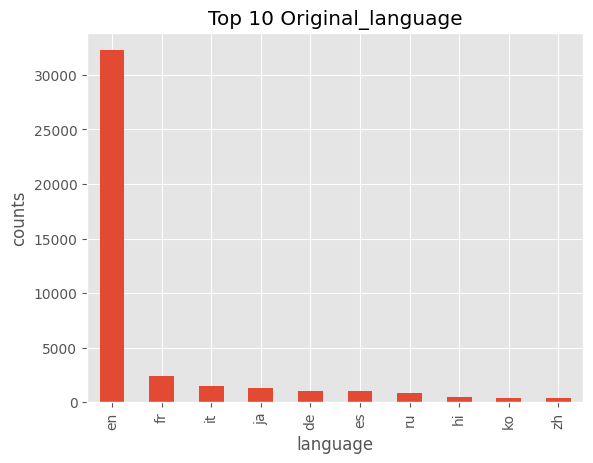

In [27]:
# languages
import matplotlib.pyplot as plt
plt.style.use('ggplot')
bar = meta['original_language'].value_counts().head(10).plot(kind='bar',title = 'Top 10 Original_language')
bar.set_xlabel('language')
bar.set_ylabel('counts')


 Correlation of the numerical columns

In [33]:
meta.dtypes

budget                       object
id                           object
imdb_id                      object
original_language            object
overview                     object
popularity                   object
poster_path                  object
release_date                 object
revenue                     float64
runtime                     float64
title                        object
vote_average                float64
vote_count                  float64
spoken_languages_new         object
genres_new                   object
production_companies_new     object
production_countries_new     object
dtype: object

In [38]:
meta_corr = meta.corr()

<ipython-input-38-2669d76b4788>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  meta_corr = meta.corr()


<Axes: >

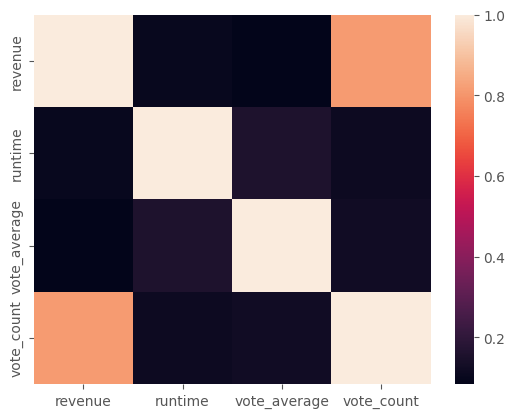

In [42]:
sns.heatmap(meta_corr)
plt

array([[<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>]], dtype=object)

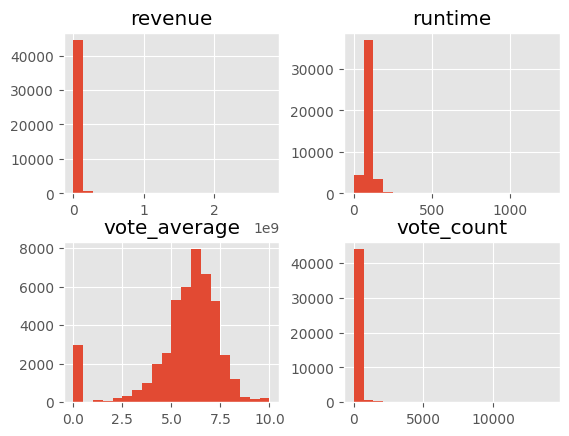

In [45]:
# Histogram for 4 numerical columns
meta.hist(bins = 20)

In [30]:
meta[meta['revenue'] == 0].shape

(38032, 17)

Revenue useless for too many 0 revenue↑